In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Task1: conduct a sales data analysis for a commercial store following a structured approach to achieve these objectives:
- Identifying best-selling products
- Understanding sales trends over time
- Customer segmentation
- Profitability by region/product
- Inventory optimization

***Step1: Clean and Prepare the Data***

In [3]:
df = pd.read_csv("retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Drop rows with invalid dates
df = df.dropna(subset=['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [8]:
df['Month'] = df['Date'].dt.to_period('M').astype(str)

***Step2: Exploratory Data Analysis (EDA)***

In [9]:
# See Monthly Sales Trend
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()
monthly_sales

,Month,Total Amount
0,2023-01,35450
1,2023-02,44060
2,2023-03,28990
3,2023-04,33870
4,2023-05,53150
5,2023-06,36715
6,2023-07,35465
7,2023-08,36960
8,2023-09,23620
9,2023-10,46580


In [10]:
# Set seaborn style
sns.set(style="whitegrid")

C:\Users\CompuHome\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CompuHome\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CompuHome\AppData\Local\Temp\ipykernel_9272\754596387.py:5: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\CompuHome\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


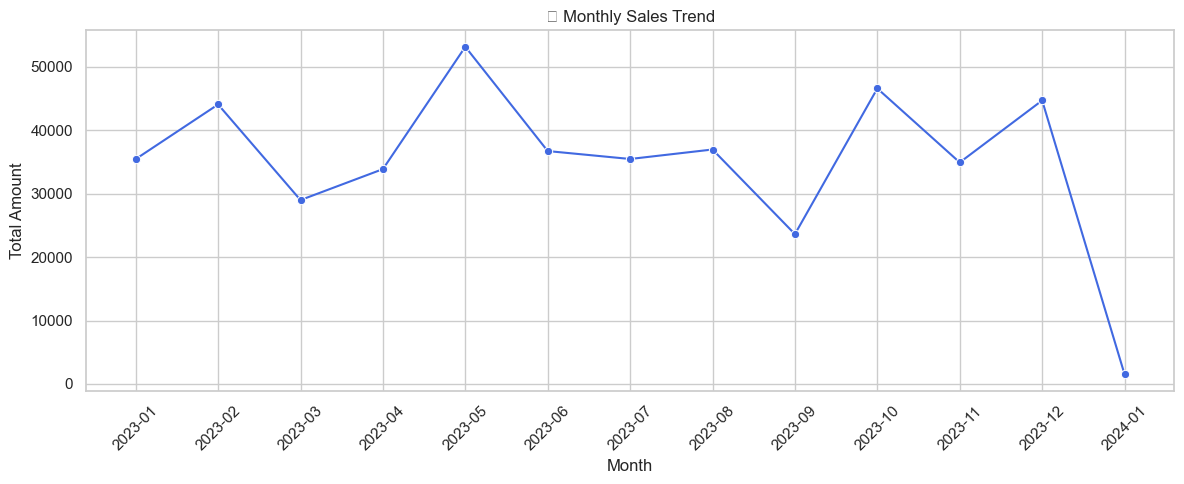

In [11]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', marker='o', color='royalblue')
plt.title('📈 Monthly Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

insights:

1- Total sales peaked significantly in May 2023, indicating a possible promotional event, product launch, or seasonal demand.

2- There was a sharp drop in sales in September, suggesting a potential issue such as stockouts, low demand, or marketing inactivity.

3- A sharp drop in sales in January 2024 is visible, possibly due to incomplete data (e.g., only partial month captured), post-holiday slowdowns, or operational pauses.

In [12]:
# Top Product Categories
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
top_products

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

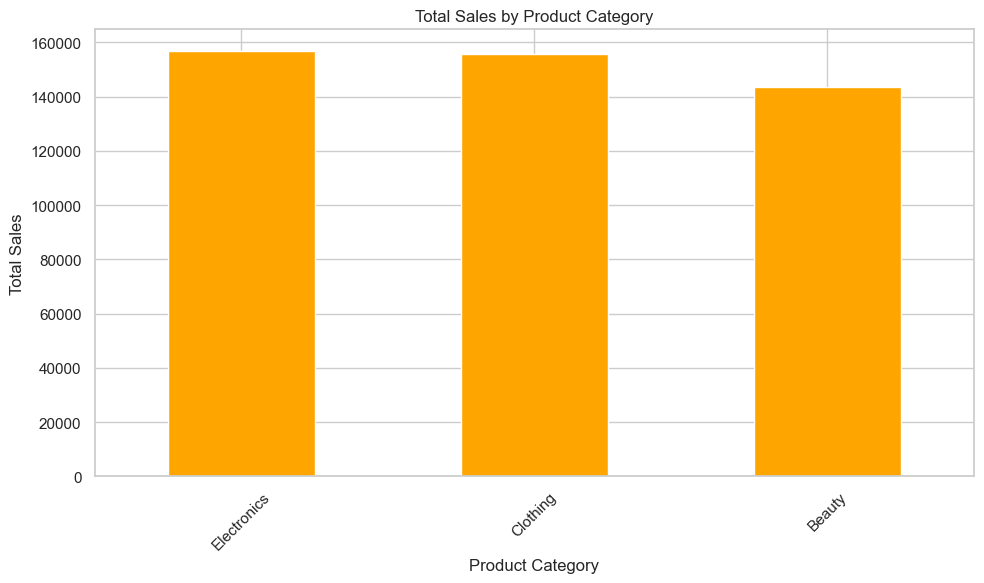

In [13]:
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
sales_by_gender = df.groupby('Gender')['Total Amount'].sum()

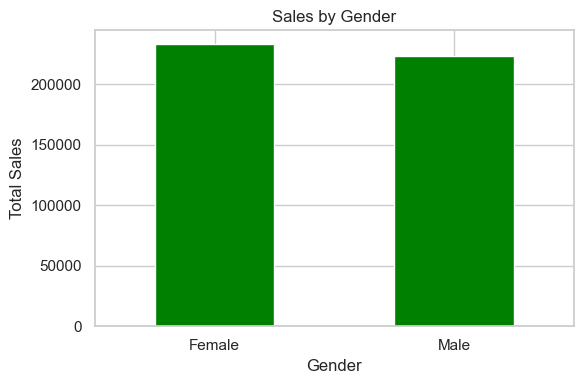

In [15]:
plt.figure(figsize=(6, 4))
sales_by_gender.plot(kind='bar', color='green')
plt.title('Sales by Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\CompuHome\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


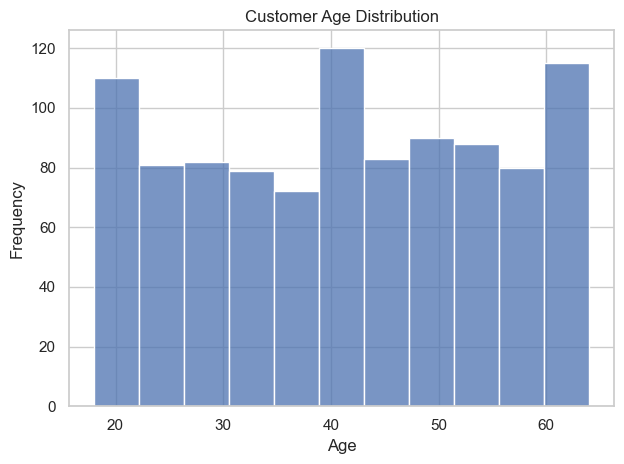

In [16]:
# Plot 4: Age Distribution
age_dist = df['Age']
sns.histplot(age_dist)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [18]:
# Print Key Insights
print("\n Top Product Categories:")
print(top_products.head(3))

print("\n Sales by Gender:")
print(sales_by_gender)

print("\n Recent Monthly Sales (Last 3 Months):")
print(monthly_sales.tail(3))


 Top Product Categories:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

 Sales by Gender:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

 Recent Monthly Sales (Last 3 Months):
      Month  Total Amount
10  2023-11         34920
11  2023-12         44690
12  2024-01          1530
